In [81]:
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)
df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

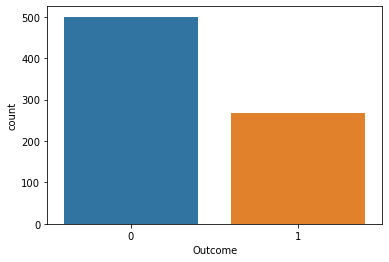

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
sns.countplot(df['Outcome'])

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

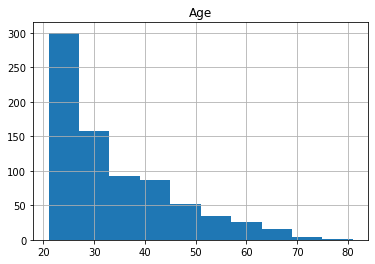

In [9]:
df.hist('Age')

array([[<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>]],
      dtype=object)

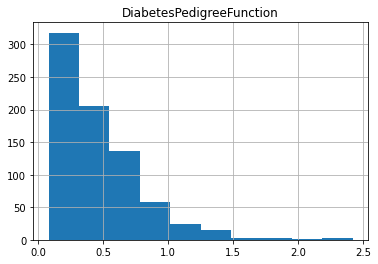

In [10]:
df.hist('DiabetesPedigreeFunction')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


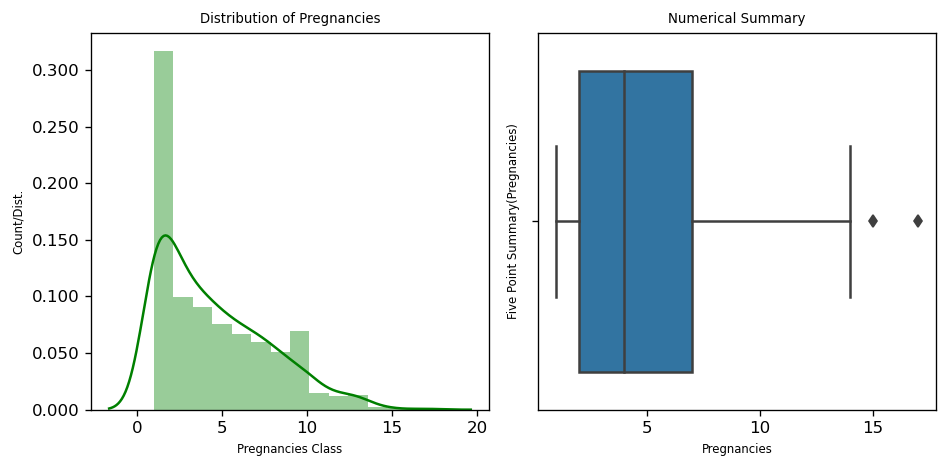

In [11]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Pregnancies']!=0]['Pregnancies'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Pregnancies',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancies Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Pregnancies']!=0]['Pregnancies'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Pregnancies',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Pregnancies)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


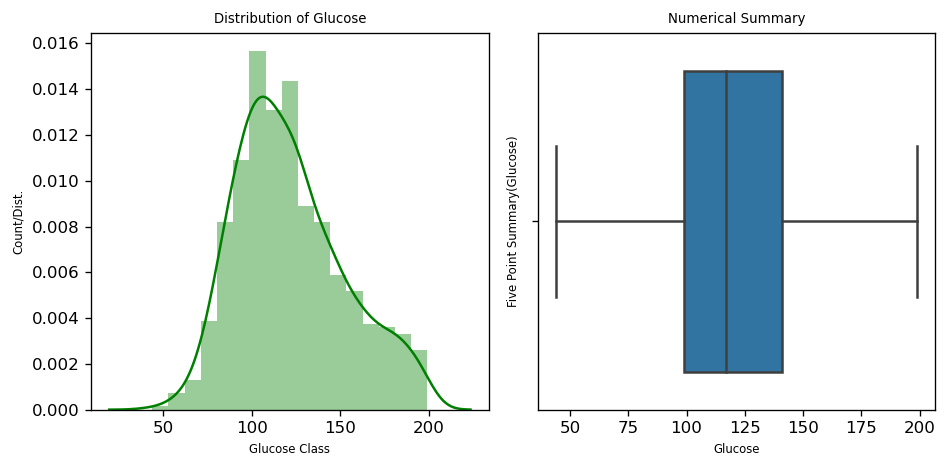

In [12]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Glucose']!=0]['Glucose'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Glucose']!=0]['Glucose'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


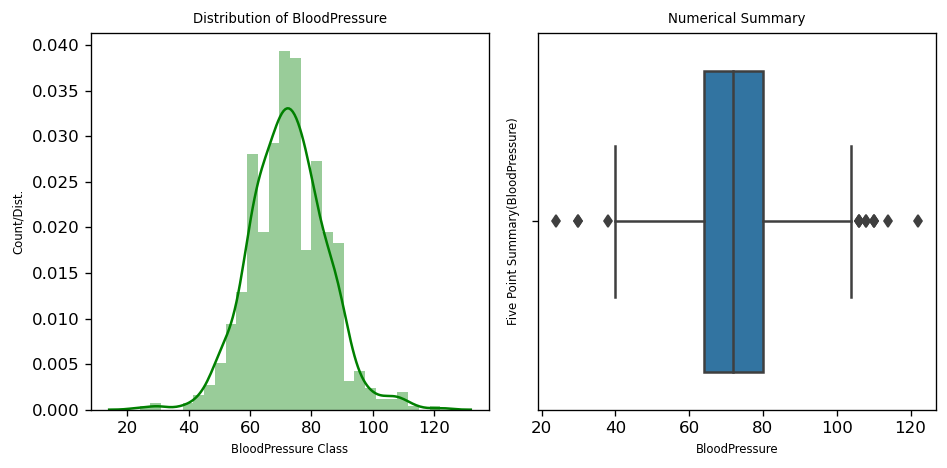

In [13]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['BloodPressure']!=0]['BloodPressure'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BloodPressure)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


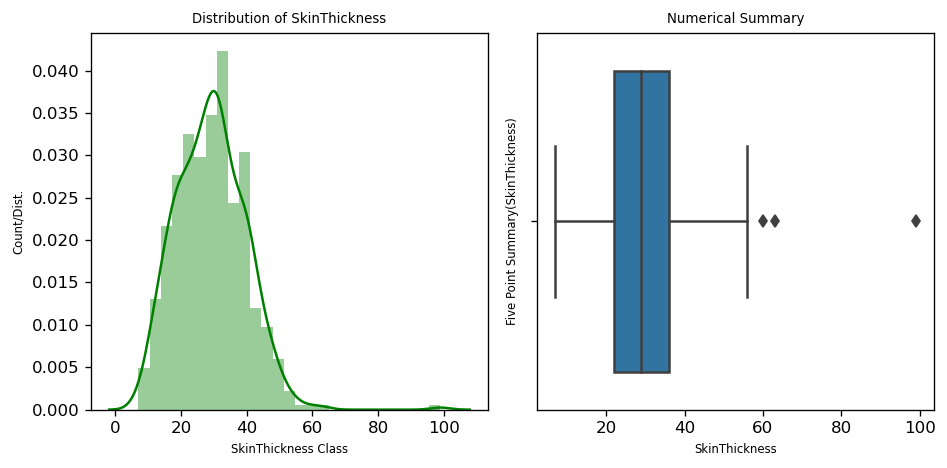

In [14]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['SkinThickness']!=0]['SkinThickness'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


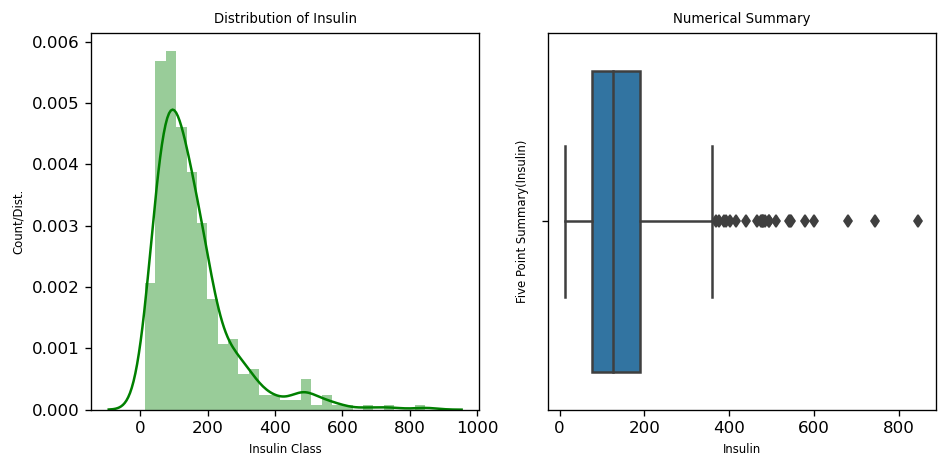

In [15]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['Insulin']!=0]['Insulin'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['Insulin']!=0]['Insulin'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Insulin',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Insulin)',fontdict={'fontsize':7})
plt.tight_layout()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


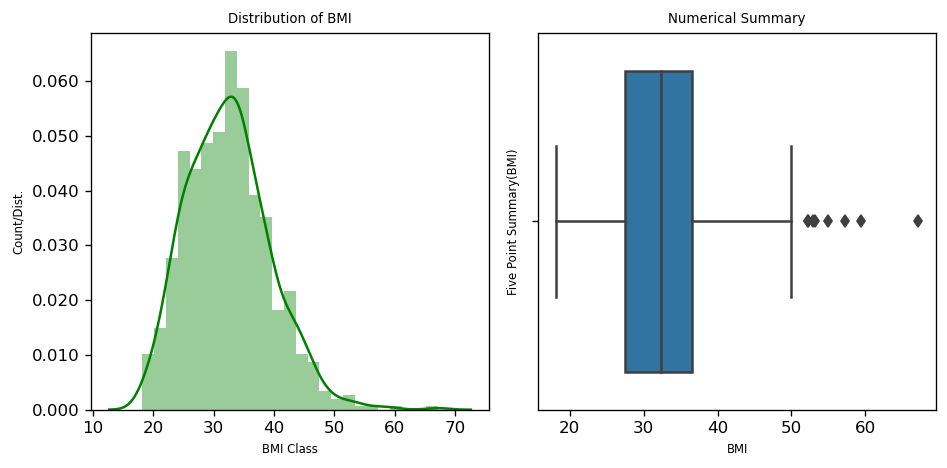

In [16]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df[df['BMI']!=0]['BMI'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df[df['BMI']!=0]['BMI'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BMI',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BMI)',fontdict={'fontsize':7})
plt.tight_layout()

In [17]:
df_copy=df.copy()
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [18]:
import numpy as np
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
df_copy_diabetic = df_copy[df_copy.Outcome==1]
df_copy_diabetic.head()
df_copy_diabetic.count()

Pregnancies                 268
Glucose                     268
BloodPressure               268
SkinThickness               268
Insulin                     268
BMI                         268
DiabetesPedigreeFunction    268
Age                         268
Outcome                     268
dtype: int64

In [26]:
df_copy_non_diabetic = df_copy[df_copy.Outcome==0]
df_copy_non_diabetic.head()
df_copy_non_diabetic.count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


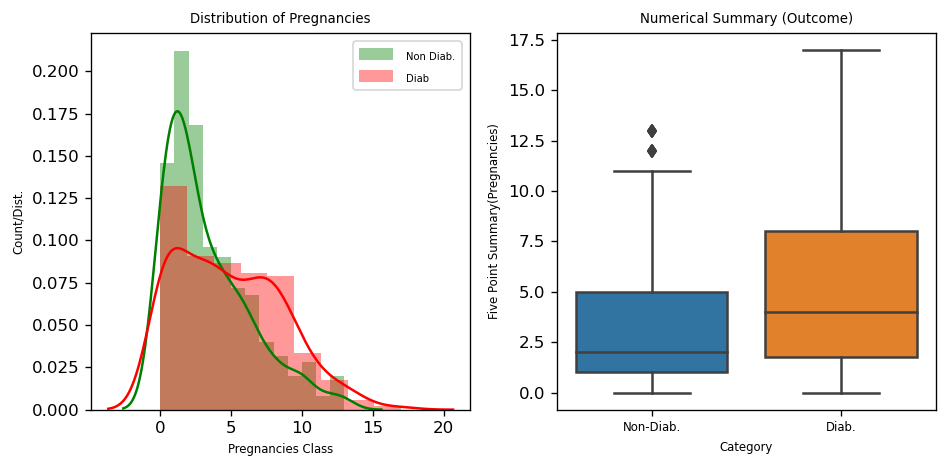

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['Pregnancies'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['Pregnancies'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of Pregnancies',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancies Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='Pregnancies',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(Pregnancies)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [27]:
df_copy_diabetic_sample_preg=df_copy_diabetic['Pregnancies']
df_copy_non_diabetic_sample_preg=df_copy_non_diabetic['Pregnancies']

stats.ttest_ind(df_copy_diabetic_sample_preg, df_copy_non_diabetic_sample_preg)

Ttest_indResult(statistic=6.298430550035151, pvalue=5.065127298053476e-10)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


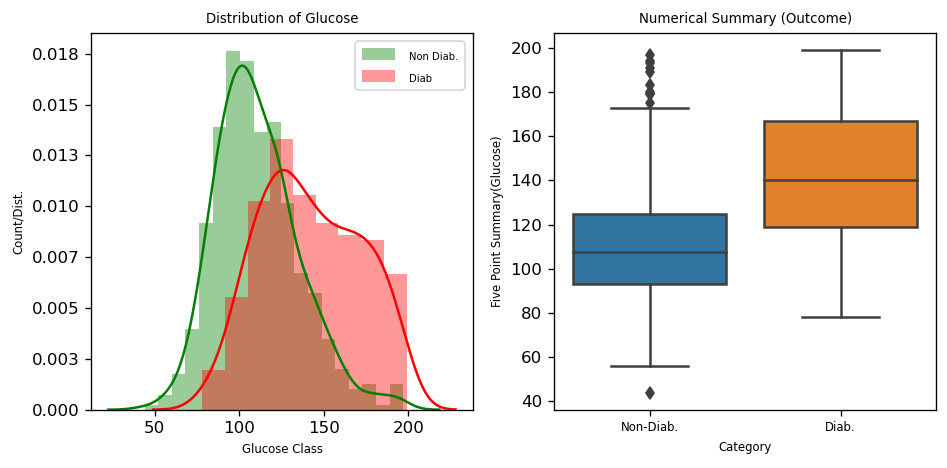

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['Glucose'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['Glucose'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='Glucose',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [30]:
df_copy_diabetic_sample_glu=df_copy_diabetic['Glucose']
df_copy_non_diabetic_sample_glu=df_copy_non_diabetic['Glucose']

stats.ttest_ind(df_copy_diabetic_sample_glu, df_copy_non_diabetic_sample_glu)

Ttest_indResult(statistic=15.679898231208346, pvalue=2.909251656846456e-48)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


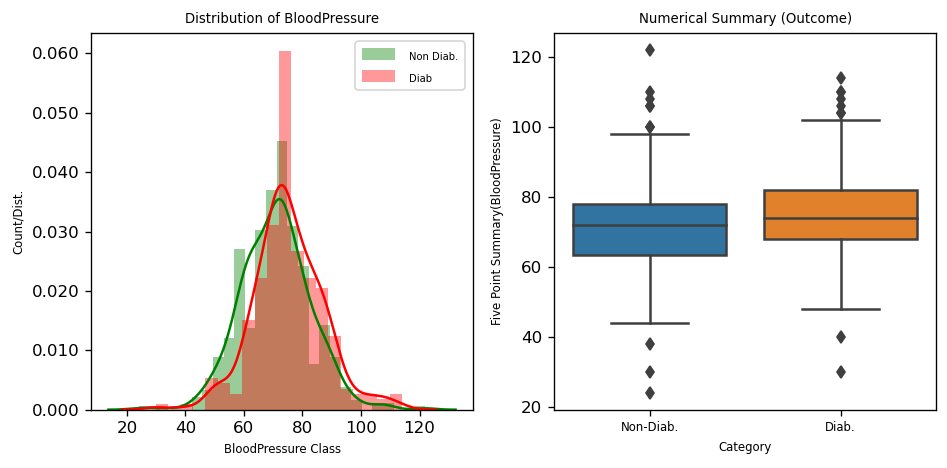

In [32]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['BloodPressure'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['BloodPressure'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='BloodPressure',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(BloodPressure)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [33]:
df_copy_diabetic_sample_blood=df_copy_diabetic['BloodPressure']
df_copy_non_diabetic_sample_blood=df_copy_non_diabetic['BloodPressure']

stats.ttest_ind(df_copy_diabetic_sample_blood, df_copy_non_diabetic_sample_blood)

Ttest_indResult(statistic=4.661098993631144, pvalue=3.709288185093571e-06)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


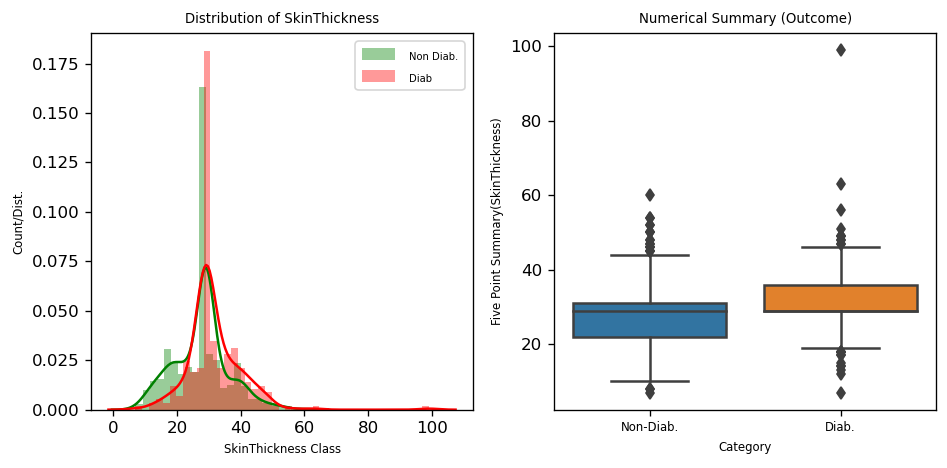

In [35]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['SkinThickness'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['SkinThickness'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='SkinThickness',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(SkinThickness)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [36]:
df_copy_diabetic_sample_skin=df_copy_diabetic['SkinThickness']
df_copy_non_diabetic_sample_skin=df_copy_non_diabetic['SkinThickness']

stats.ttest_ind(df_copy_diabetic_sample_skin, df_copy_non_diabetic_sample_skin)

Ttest_indResult(statistic=6.089214889295934, pvalue=1.7939583262325828e-09)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


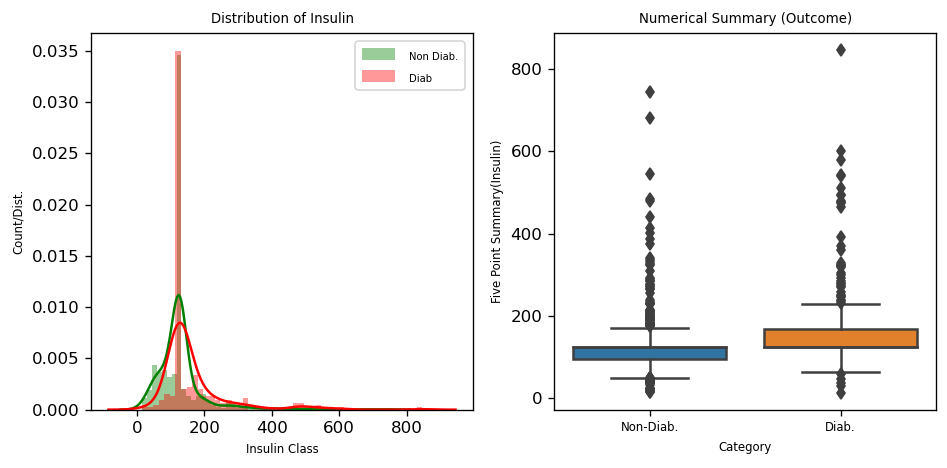

In [38]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['Insulin'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['Insulin'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='Insulin',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(Insulin)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [39]:
df_copy_diabetic_sample_in=df_copy_diabetic['Insulin']
df_copy_non_diabetic_sample_in=df_copy_non_diabetic['Insulin']

stats.ttest_ind(df_copy_diabetic_sample_in, df_copy_non_diabetic_sample_in)

Ttest_indResult(statistic=5.76114539252401, pvalue=1.210025703412445e-08)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


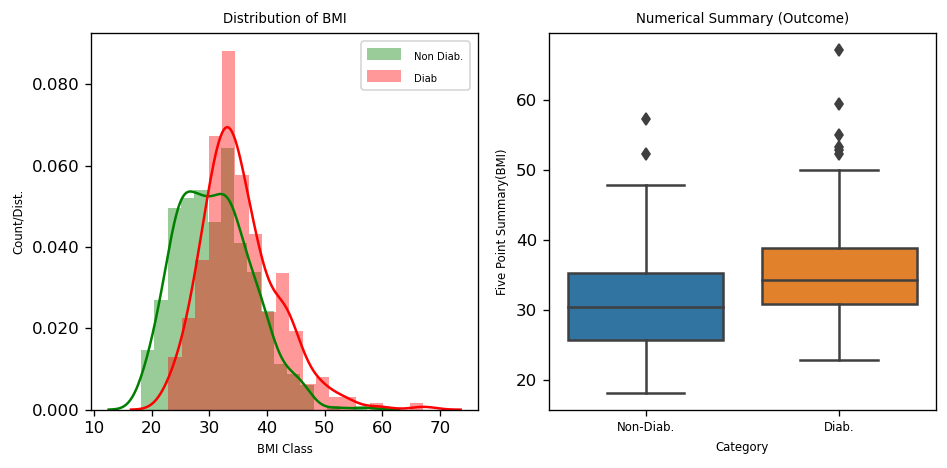

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['BMI'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['BMI'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='BMI',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(BMI)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [89]:
df_copy_diabetic_sample_bmi=df_copy_diabetic['BMI']
df_copy_non_diabetic_sample_bmi=df_copy_non_diabetic['BMI']

stats.ttest_ind(df_copy_diabetic_sample_bmi, df_copy_non_diabetic_sample_bmi)

Ttest_indResult(statistic=9.090064413986648, pvalue=8.336902677509037e-19)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


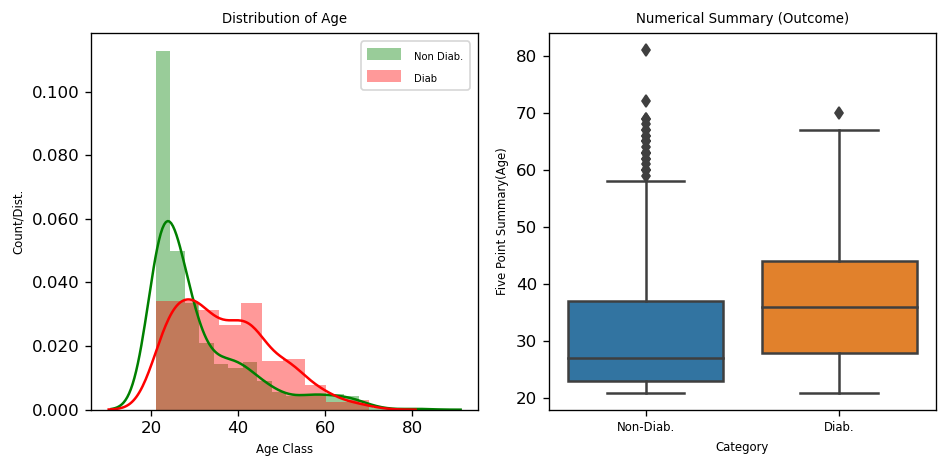

In [87]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df_copy[df_copy['Outcome']==False]['Age'],ax=axes[0],color='green',label='Non Diab.')
sns.distplot(df_copy[df_copy.Outcome==True]['Age'],ax=axes[0],color='red',label='Diab')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot00.axes.legend(loc=1)

plt.setp(axes[0].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot01=sns.boxplot(x='Outcome',y='Age',data=df_copy,ax=axes[1])
axes[1].set_title(r'Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1].set_ylabel(r'Five Point Summary(Age)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

In [88]:
df_copy_diabetic_sample_age=df_copy_diabetic['Age']
df_copy_non_diabetic_sample_age=df_copy_non_diabetic.sample(30)['Age']

stats.ttest_ind(df_copy_diabetic_sample_age, df_copy_non_diabetic_sample_age)

Ttest_indResult(statistic=6.792688071649956, pvalue=2.2099754606654358e-11)

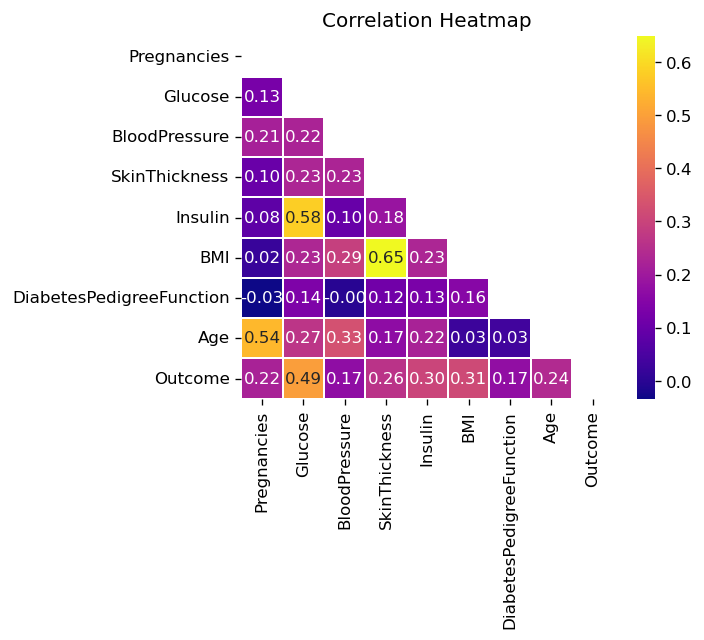

In [43]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_copy.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
#3. Conduct Multiple Linear Regression and ANOVA modeling on the dataset. What do each modeling step reveal?

In [45]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [59]:
X = df_copy[['Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df_copy['Outcome']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [62]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Pregnancies,0.016386
Glucose,0.006651
BloodPressure,-0.002091
SkinThickness,-0.000847
Insulin,-0.000236
BMI,0.015503
DiabetesPedigreeFunction,0.124008
Age,0.002990


In [64]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
661,1,1.051964
122,0,0.213608
113,0,0.070809
14,1,0.636426
529,0,0.137337
...,...,...
476,1,0.211130
482,0,0.065213
230,1,0.637136
527,0,0.154356


In [67]:
from sklearn import metrics

print('R squared: {:.2f}'.format(regressor.score(X,y)*100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R squared: 31.95
Mean Absolute Error: 0.3086195288370292
Mean Squared Error: 0.13931498760305186
Root Mean Squared Error: 0.3732492298760332


In [68]:
y.mean()

0.3489583333333333

In [69]:
#ANOVA

In [70]:
df_copy.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [74]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [75]:
category1=pd.cut(df_copy.Age,bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])
#df_copy=df_copy.drop('AgeBin', axis=1)
df_copy.insert(7,'AgeBin',category1)
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,AgeBin,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,48-58,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,28-38,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,28-38,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,18-28,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,28-38,33,1


[Text(0.5, 1.0, 'AgeBIN Vs Outcomes')]

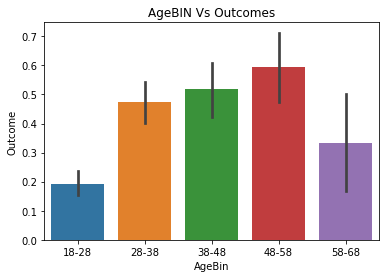

In [77]:
sns.barplot(x=df_copy.AgeBin,y=df_copy.Outcome).set(title='AgeBIN Vs Outcomes')

In [76]:
df2=pd.DataFrame({'18-28':df_copy[df_copy['AgeBin']=='18-28']['Outcome'],
                 '28-38':df_copy[df_copy['AgeBin']=='28-38']['Outcome'],
                 '38-48':df_copy[df_copy['AgeBin']=='38-48']['Outcome'],
                 '48-58':df_copy[df_copy['AgeBin']=='48-58']['Outcome'],
                '58-68':df_copy[df_copy['AgeBin']=='58-68']['Outcome']
                 })
df2.head()

,18-28,28-38,38-48,48-58,58-68
0,NaN,NaN,NaN,1.0,NaN
1,NaN,0.0,NaN,NaN,NaN
2,NaN,1.0,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN
4,NaN,1.0,NaN,NaN,NaN


In [92]:
import random
np.random.seed(1234)
dataNew=pd.DataFrame({'18-28':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='18-28']), 30),
'28-38':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='28-38']), 30),
'38-48':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='38-48']), 30),
'48-58':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='48-58']), 30),
'58-68':random.sample(list(df_copy['Outcome'][df_copy['AgeBin']=='58-68']), 30)})
dataNew.head()
               
    

,18-28,28-38,38-48,48-58,58-68
0,0,0,0,1,0
1,1,1,0,1,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,0,0,1,0


In [79]:
F, p = stats.f_oneway(dataNew['18-28'],dataNew['28-38'],dataNew['38-48'],dataNew['48-58'],dataNew['58-68'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=4.174, p=0.003


In [82]:
model = ols('Outcome ~ C(AgeBin)', df_copy).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     23.07
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           5.20e-18
Time:                        21:39:48   Log-Likelihood:                -473.94
No. Observations:                 763   AIC:                             957.9
Df Residuals:                     758   BIC:                             981.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.1935      0.024      8.203      0.000       0.147       0.240
C(AgeBin)[T.28-38]     0.2791      0.041      6.813      0.000       0.199       0.359
C(AgeBin)[T.38-48]     0.3265      0.047      6.979      0.000       0.235       0.418
C(AgeBin)[T.48-58]     0.3998      0.063      6.308      0.000       0.275       0.524
C(AgeBin)[T.58-68]     0.1399      0.086      1.630      0.103      -0.029       0.308
==============================================================================
Omnibus:                      650.165   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.016
Skew:                           0.516   Prob(JB):                     2.56e-18
Kurtosis:                       1.781   Cond. No.                         5.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 4, 758) =  23.069, p =  0.0000


,sum_sq,df,F,PR(>F)
C(AgeBin),18.836599,4.0,23.069314,5.197349e-18
Residual,154.730897,758.0,NaN,NaN


In [93]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_copy, res_var='Outcome', xfac_var='AgeBin', anova_model='Outcome ~ C(AgeBin)')
res.tukey_summary

/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:365: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,48-58,28-38,0.120693,-0.064386,0.305772,2.521714,0.385357
1,48-58,18-28,0.399760,0.226477,0.573043,8.921020,0.001000
2,48-58,58-68,0.259887,-0.017137,0.536911,3.627749,0.078139
3,48-58,38-48,0.073220,-0.121916,0.268356,1.450992,0.822998
4,28-38,18-28,0.279067,0.167065,0.391069,9.635008,0.001000
5,28-38,58-68,0.139194,-0.104240,0.382628,2.211110,0.518390
6,28-38,38-48,0.047473,-0.096039,0.190985,1.279160,0.891858
7,18-28,58-68,0.139873,-0.094718,0.374464,2.305647,0.479105
8,18-28,38-48,0.326540,0.198600,0.454479,9.869662,0.001000
9,58-68,38-48,0.186667,-0.064499,0.437832,2.873940,0.251511


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


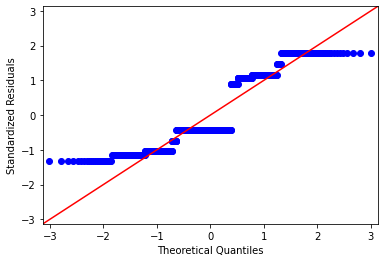

In [94]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

In [ ]:
#two-way Anova 

In [95]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
formula = ' DiabetesPedigreeFunction~ C(Outcome) + C(AgeBin) + C(Outcome):C(AgeBin)'
model = ols(formula, df_copy).fit()
aov_table = anova_lm(model, typ=2)
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov
eta_squared(aov_table)
omega_squared(aov_table)
aov_table.round(3)

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
C(Outcome),2.300,1.0,21.580,0.000,0.028,0.026
C(AgeBin),0.471,4.0,1.105,0.353,0.006,0.001
C(Outcome):C(AgeBin),0.566,4.0,1.329,0.258,0.007,0.002
Residual,80.252,753.0,NaN,NaN,NaN,NaN


In [102]:
#!pip install bioinfokit==1.0.3
#import bioinfokit.abalysis
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=df_copy, res_var='DiabetesPedigreeFunction', xfac_var=['AgeBin','Outcome'], anova_model='DiabetesPedigreeFunction~ C(Outcome) + C(AgeBin) + C(Outcome):C(AgeBin)')
res.tukey_summary

/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:331: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(48-58, 1)","(48-58, 0)",0.113323,-0.161227,0.387873,1.852321,0.900000
1,"(48-58, 1)","(28-38, 1)",0.025556,-0.182148,0.233260,0.552169,0.900000
2,"(48-58, 1)","(28-38, 0)",0.151843,-0.052707,0.356394,3.331317,0.355534
3,"(48-58, 1)","(18-28, 1)",0.004674,-0.209282,0.218631,0.098045,0.900000
4,"(48-58, 1)","(18-28, 0)",0.176854,-0.008315,0.362024,4.286147,0.075811
5,"(48-58, 1)","(58-68, 1)",0.108414,-0.263042,0.479870,1.309786,0.900000
6,"(48-58, 1)","(58-68, 0)",0.207964,-0.082416,0.498345,3.213974,0.411326
7,"(48-58, 1)","(38-48, 1)",0.137130,-0.080063,0.354322,2.833401,0.583083
8,"(48-58, 1)","(38-48, 0)",0.151981,-0.068356,0.372318,3.095444,0.467917
9,"(48-58, 0)","(28-38, 1)",0.087766,-0.151387,0.326920,1.646922,0.900000


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


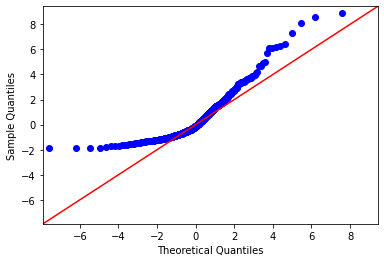

In [96]:
res = model.resid 
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()